In [1]:
import os
import numpy as np
import shutil
import random
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import ndimage
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(tf.__version__)

2.15.0


In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-06-07 04:03:11--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   216MB/s    in 0.3s    

2024-06-07 04:03:11 (216 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [5]:
# Rescale image train dan test

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  # Resize agar semua image memiliki format yang sama
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


View images

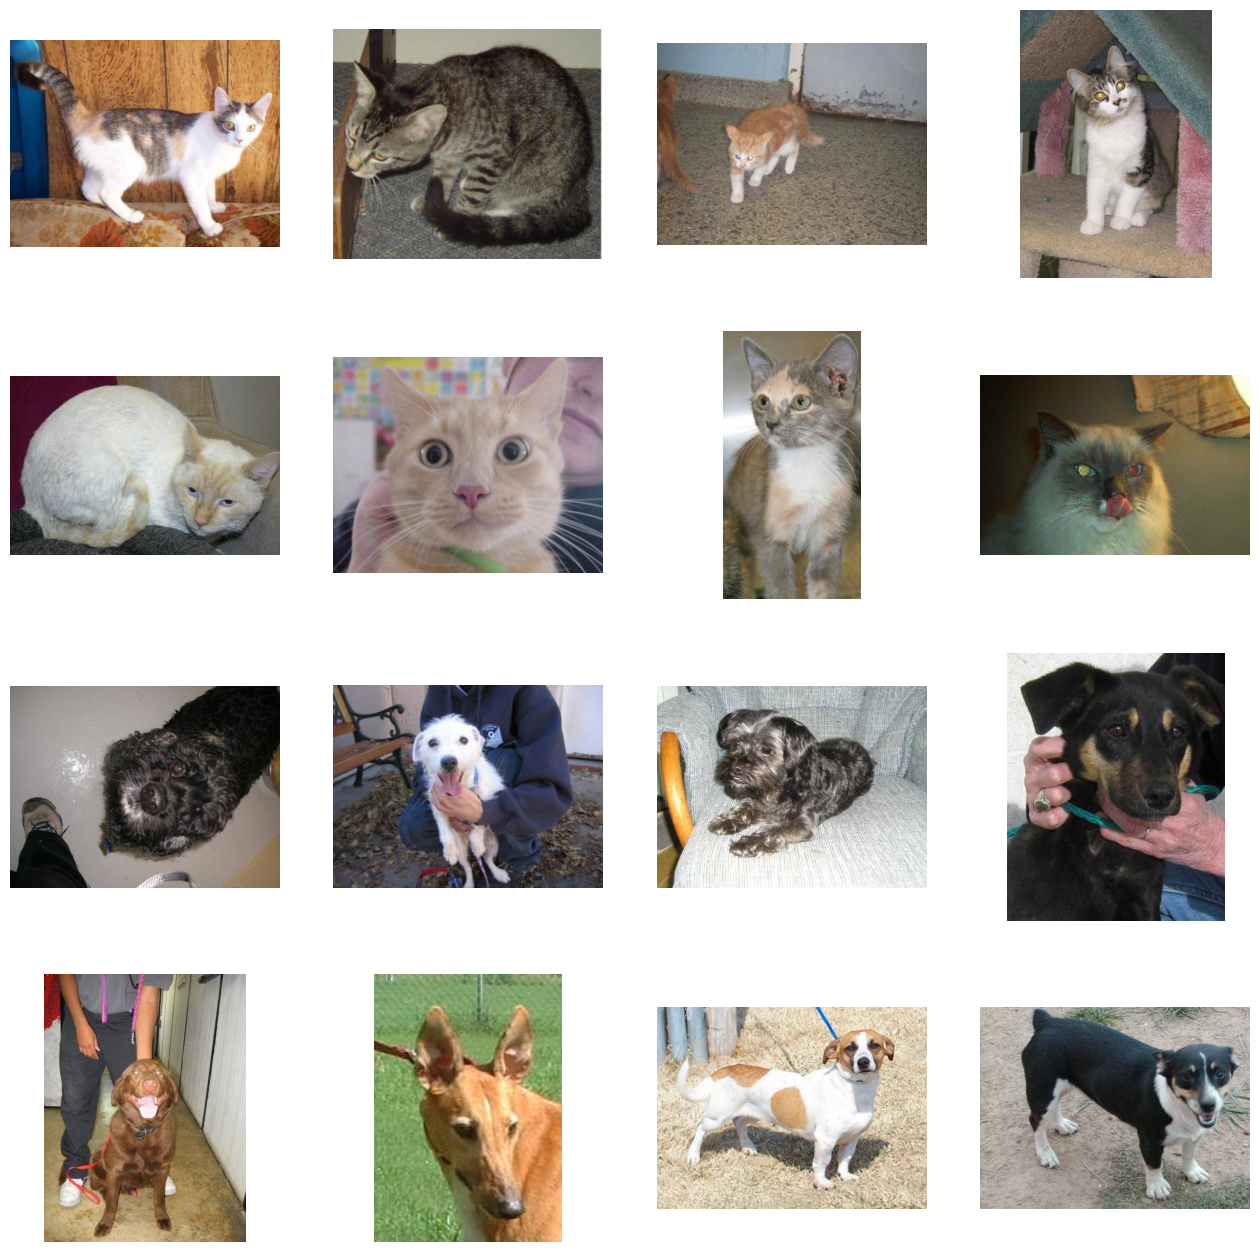

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Build simple CNN Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 68s - loss: 0.7415 - accuracy: 0.5265 - val_loss: 0.6804 - val_accuracy: 0.5690 - 68s/epoch - 676ms/step
Epoch 2/15
100/100 - 58s - loss: 0.6511 - accuracy: 0.6320 - val_loss: 0.6170 - val_accuracy: 0.6340 - 58s/epoch - 579ms/step
Epoch 3/15
100/100 - 55s - loss: 0.5883 - accuracy: 0.6880 - val_loss: 0.5743 - val_accuracy: 0.7030 - 55s/epoch - 546ms/step
Epoch 4/15
100/100 - 57s - loss: 0.5295 - accuracy: 0.7315 - val_loss: 0.6222 - val_accuracy: 0.6800 - 57s/epoch - 571ms/step
Epoch 5/15
100/100 - 57s - loss: 0.4750 - accuracy: 0.7650 - val_loss: 0.5404 - val_accuracy: 0.7340 - 57s/epoch - 573ms/step
Epoch 6/15
100/100 - 56s - loss: 0.4261 - accuracy: 0.8035 - val_loss: 0.6409 - val_accuracy: 0.7050 - 56s/epoch - 556ms/step
Epoch 7/15
100/100 - 56s - loss: 0.3737 - accuracy: 0.8370 - val_loss: 0.5811 - val_accuracy: 0.7360 - 56s/epoch - 556ms/step
Epoch 8/15
100/100 - 55s - loss: 0.2945 - accuracy: 0.8720 - val_loss: 0.6487 - val_accuracy: 0.7090 - 55s/epoch - 547

<Figure size 640x480 with 0 Axes>

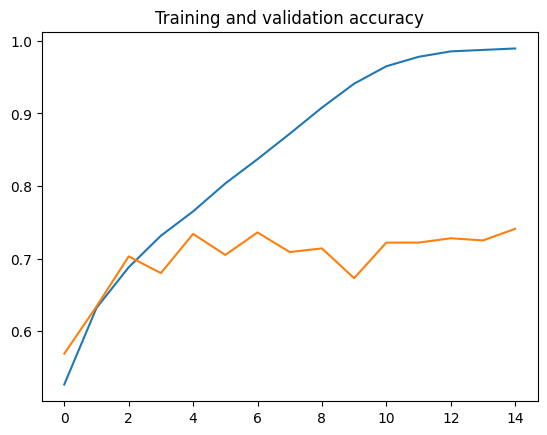

<Figure size 640x480 with 0 Axes>

In [10]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

## Image Augmentation

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 72s - loss: 0.7116 - accuracy: 0.6215 - val_loss: 0.5984 - val_accuracy: 0.6750 - 72s/epoch - 721ms/step
Epoch 2/15
100/100 - 71s - loss: 0.6119 - accuracy: 0.6740 - val_loss: 0.5215 - val_accuracy: 0.7620 - 71s/epoch - 709ms/step
Epoch 3/15
100/100 - 70s - loss: 0.5935 - accuracy: 0.6915 - val_loss: 0.5324 - val_accuracy: 0.7430 - 70s/epoch - 698ms/step
Epoch 4/15
100/100 - 68s - loss: 0.5843 - accuracy: 0.7020 - val_loss: 0.5133 - val_accuracy: 0.7500 - 68s/epoch - 679ms/step
Epoch 5/15
100/100 - 68s - loss: 0.5721 - accuracy: 0.7010 - val_loss: 0.5172 - val_accuracy: 0.7440 - 68s/epoch - 682ms/step
Epoch 6/15
100/100 - 68s - loss: 0.5613 - accuracy: 0.7100 - val_loss: 0.5056 - val_accuracy: 0.7340 - 68s/epoch - 677ms/step
Epoch 7/15
100/100 - 68s - loss: 0.5704 - accuracy: 0.7120 - val_loss: 0.5760 - val_accuracy: 0.7170 - 68s/epoch - 682ms/step
Epoch 8/15
100/100 - 84s - loss: 0.5464 - accuracy: 0.7110 - val_loss: 0.6806 - val_accuracy: 0.6720 - 84s/epoch - 844

<Figure size 640x480 with 0 Axes>

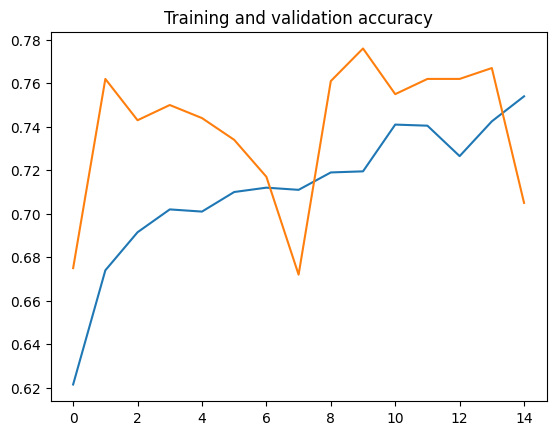

<Figure size 640x480 with 0 Axes>

In [13]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

## Transfer Learning

In [14]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)

83683744/83683744 [==============================] - 0s 0us/step


In [15]:
base_model.trainable = False

In [16]:
inputs = keras.Input(shape=(150, 150, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 250s - loss: 1.3368 - accuracy: 0.8450 - val_loss: 0.3951 - val_accuracy: 0.9390 - 250s/epoch - 2s/step
Epoch 2/15
100/100 - 249s - loss: 0.8535 - accuracy: 0.8995 - val_loss: 0.3953 - val_accuracy: 0.9410 - 249s/epoch - 2s/step
Epoch 3/15
100/100 - 248s - loss: 0.6797 - accuracy: 0.9160 - val_loss: 0.5576 - val_accuracy: 0.9430 - 248s/epoch - 2s/step
Epoch 4/15
100/100 - 250s - loss: 0.7265 - accuracy: 0.9175 - val_loss: 0.4966 - val_accuracy: 0.9480 - 250s/epoch - 2s/step
Epoch 5/15
100/100 - 249s - loss: 0.8593 - accuracy: 0.9125 - val_loss: 0.4151 - val_accuracy: 0.9560 - 249s/epoch - 2s/step
Epoch 6/15
100/100 - 251s - loss: 0.6983 - accuracy: 0.9245 - val_loss: 0.6358 - val_accuracy: 0.9460 - 251s/epoch - 3s/step
Epoch 7/15
100/100 - 250s - loss: 0.7553 - accuracy: 0.9205 - val_loss: 0.4474 - val_accuracy: 0.9520 - 250s/epoch - 2s/step
Epoch 8/15
100/100 - 247s - loss: 0.7958 - accuracy: 0.9195 - val_loss: 0.5659 - val_accuracy: 0.9520 - 247s/epoch - 2s/step


<Figure size 640x480 with 0 Axes>

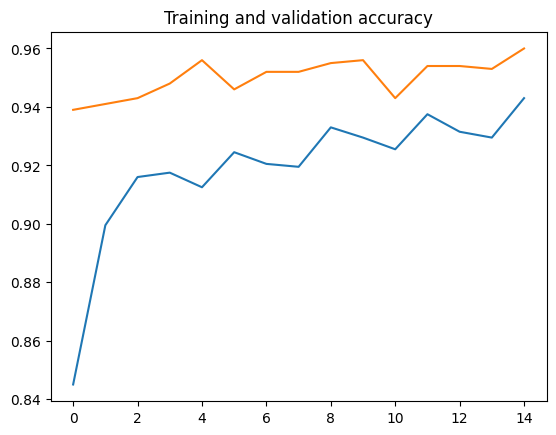

<Figure size 640x480 with 0 Axes>

In [19]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()